# <center>升维嵌入学习算法：求解二维 Poisson 方程的格林函数（点源问题）</center>

## 1. 问题描述（Poisson's Equations in Two Dimension）

考虑二维圆盘上的 Poisson 方程：
$$
\begin{array}{cl}
    -\Delta u(x) = f(x), \ &\ \ \ \textnormal{for}\ x \in \Omega = \{x : \lVert x \rVert^2 = x_1^2+x_2^2 < 1\}, \\
    u(x) = 0, \ &\ \ \ \textnormal{for}\ x\in \partial\Omega,
\end{array}
$$

其格林函数 $G(x,y)$ 满足：对任一固定 $y\in\Omega$，
$$
\begin{array}{cl}
	- \Delta G(x,y)  = \delta(x-y), \ \ \ & \ \textnormal{for}\ x\in\Omega, \\
	G(x,y) = 0, \ \ \  & \ \textnormal{for}\ x\in\partial\Omega,
\end{array}
$$
其中 $\delta(\cdot)$ 表示 [Dirac delta 函数](https://en.wikipedia.org/wiki/Dirac_delta_function)。特别的，在半径为 $\epsilon$ 的小球 $B_\epsilon(y) = \{ x \, | \, \| x-y \| < \epsilon\}$ 上对 $\delta(x-y)$ 函数进行积分，上述方程也可等价写为：对任一固定 $y\in\Omega$， 
$$
\begin{array}{cl}
    -\Delta G(x,y) = 0, \ \ \ & \ \textnormal{for}\ x\in\Omega\setminus\Gamma, \\
    \displaystyle - \int_{\partial B_\epsilon(y)} \nabla G(x, y) \cdot \vec{n}_{x} \, dS(x) = 1, \ \ \ &\ \textnormal{for}\ x\in\Gamma = \{ x \,|\, x=y\},\\
	G(x,y) = 0, \ \ \ &\ \textnormal{for}\ x\in\partial\Omega,
\end{array}
$$
其中 $ \vec{n}(x) = \frac{x-y}{\lVert x-y \rVert}$ 表示小球 $\partial B_\epsilon(y)$ 的单位外法向量。特别的，通过定义 $y^* := \frac{y}{\lVert y \rVert^2}$，此时格林函数真解可表示为
$$
    G(x,y) =  -\frac{1}{2\pi} \ln \left(  \frac{\lVert x-y \rVert}{\lVert x - y^* \rVert} \cdot \frac{1}{\lVert y \rVert} \right) = - \frac{1}{4\pi}\ln \left( \dfrac{(x_1-y_1)^2+(x_2-y_2)^2}{(x_1y_2-x_2y_1)^2+(x_1y_1+x_2y_2-1)^2} \right).
$$

## 2. 升维嵌入学习方法

不同于一维问题所表现出的导数跳量，此时格林函数 $G(x,y)$ 在 $\Gamma=\{x=y\}$ 附近处表现为对数奇性：
$$
    |G(x,y)| \sim \ln(\| x - y \|),
$$
且对变系数的二阶椭圆方程（在较弱的正则性要求下）依旧成立。基于上述先验知识，通过引入辅助变量 $\varphi(x,y)=\ln(\| x - y\|)$，考虑如下形式的替代模型
$$
    G(x,y) = \widehat{G}(x, y,  \varphi( x, y )) 
$$
并将其代回到原方程推导得出：对任一固定 $y\in\Omega$，
$$
\begin{array}{cl}
    -\Delta_{x}\widehat{G}(x,y,\varphi(x,y)) - 2 \nabla_{x} \big( \partial_z \widehat{G}(x,y,\varphi(x,y)) \big) \cdot \dfrac{x-y}{\lVert x-y \rVert ^2}  - \dfrac{\partial_{zz}\widehat{G}(x,y,\varphi(x,y))}{\lVert x - y \rVert ^2} = 0, \ \ \ &\ \textnormal{for}\ x\in\Omega\setminus\Gamma, \\
\displaystyle -\int_{\partial B_\epsilon (y)} \bigg(\nabla_{x}G(x,y,\varphi(x,y)) \cdot \dfrac{x-y}{\lVert x - y \rVert} + \dfrac{\partial_z\widehat{G}(x,y,\varphi(x,y))}{\lVert x - y \rVert}\bigg) d S(x) = 1, \ \ \ &\ \textnormal{for} \ x\in\Gamma,\\
G(x,y,\varphi(x,y)) = 0, \ \ \ &\ \textnormal{for}\ x\in\partial\Omega.
\end{array}
$$
注意到，在 $\Gamma=\{x=y\}$ 附近通过链式法则求导时，即
$$
	\nabla G(x,y) = \nabla \widehat{G}(x,y, \varphi(x,y)) = \nabla_{x} \widehat{G}(x,y,\varphi(x,y)) + \nabla \varphi(x,y) \partial_z \widehat{G}(x,y,\varphi(x,y)),
$$
格林函数 $G(x,y)$ 的指数奇性可由辅助变量代为控制，因此升维函数 $\widehat{G}(x, y, z)$ 的偏导数保持有界，进而易于数值计算。

#### 函数逼近
由于辅助变量的引入导致函数自变量维数的升高，因此我们使用一个全连接网络来克服“维数灾难”的问题，即
$$
    \widehat{G}(x,y,\varphi(x,y)) \approx \widehat{G}_{NN}(x,y,\varphi(x,y)).
$$
其中 $\theta$ 表示神经网络的待定参数。特别的，得益于光滑性的提升，仅需采用光滑的[激活函数](https://en.wikipedia.org/wiki/Activation_function)即可，无需做特殊设计。

#### 损失函数

通过方程的残量来定义格林函数在光滑、奇性、边界处的损失函数，以及由格林函数本身的对称性构造的损失函数
$$
    \displaystyle  L_{\textnormal{Reglr}} (\theta) = \frac{1}{M} \sum_{m=1}^M \bigg( \frac{1}{N_{\textnormal{R}}} \sum_{n=1}^{N_{\textnormal{R}}} 
			\bigg| \Big( \Delta_{x}+ 2 \nabla \varphi( x_n^{\Omega}, y_m ) \cdot \nabla_{x} \, \partial_z + \|\nabla \varphi( x_n^{\Omega}, y_m ) \|^2 \partial_{zz} \Big)\widehat{G}( x_n^{\Omega}, y_m, \varphi( x_n^{\Omega}, y_m ) ;\theta) \bigg|^2 \bigg),
$$
$$
	\displaystyle L_{\textnormal{Snglr}}^{d\geq 2} (\theta) = \frac{1}{M} \sum_{m=1}^M \bigg( 1 + \frac{2\pi \epsilon}{N_{\textnormal{S}}} \sum_{n=1}^{N_{\textnormal{S}}}  \big( \nabla_{x} + \nabla \varphi( x_n^{\Gamma}, y_m ) \partial_z \big) \widehat{G}( x_n^{\Gamma}, y_m, \varphi( x_n^{\Gamma}, y_m ) ;\theta) \cdot \frac{x_n^\Gamma - y_m}{ \lVert x_n^\Gamma - y_m \rVert}  \bigg)^2, 
$$
$$
	\displaystyle L_{\textnormal{Bndry}} (\theta) =  \frac{1}{M} \sum_{m=1}^M \bigg( \frac{1}{N_{\textnormal{B}}} \sum_{n=1}^{N_{\textnormal{B}}} \big|  \widehat{G}( x_n^{\partial \Omega}, y_m, \varphi( x_n^{\partial\Omega}, y_m ) ;\theta) \big|^2 \bigg),
$$
$$
    L_{\textnormal{Symtr}}( \theta ) = \frac{1}{M} \sum_{m=1}^{M}  \Bigg( \frac{1}{N_{\textnormal{R}}} \sum_{n=1}^{N_{\textnormal{R}}} \left| \widehat{G}( x_n^{\Omega}, y_m, \varphi( x_n^{\Omega}, y_m) ) - \widehat{G}( y_m, x_n^{\Omega}, \varphi( y_m, x_n^{\Omega} ) ) \right|^2 \Bigg),
$$
进而通过求解以下优化问题来近似得到神经网络的最优参数

\begin{equation*}
	\theta^* = \operatorname*{arg\, min}_\theta ~~ L_{\textnormal{Reglr}} (\theta) + \beta_{\textnormal{Snglr}} L_{\textnormal{Snglr}}^{d = 1} (\theta) + \beta_{\textnormal{Bndry}} L_{\textnormal{Bndry}} (\theta) + \beta_{\textnormal{Symtr}} L_{\textnormal{Symtr}}( \theta )
\end{equation*}
其中 $\beta_{\textnormal{Snglr}}$、$\beta_{\textnormal{Bndry}}$ 和 $\beta_{\textnormal{Symtr}}$ 为惩罚系数。

#### 点源示例（格林函数需遍历更多样本点）

为了快速验证升维嵌入学习方法的有效性，此处仅测试点源 $(y_1,y_2)=(0,0)$ 处格林函数 $G(x_1,x_2,0,0)$ 的计算效果，此时由对称性构造的损失函数可被忽略。

## 3.编程求解

### 3-1. 准备工作 - 调用函数库

In [1]:
import torch
import torch.nn as nn
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import datetime
import argparse 

from torch import optim, autograd
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt

# matlab to tensor and vice versa
from scipy.io import loadmat
import numpy as np
import scipy.io as io

# load data from two datasets within the same loop
from itertools import cycle

print("pytorch version", torch.__version__, "\n")
torch.set_default_dtype(torch.float64)

pytorch version 2.4.0 



### 3-1. 准备工作 - 全连接神经网络

In [2]:
class FcBlock(nn.Module):
    """ 
        dim_in  -- dimension of each block's input data
        width   -- number of nodes in each block's hidden layer
        dim_out -- dimension of each block's output data (not the dimension of final output)  
    """
    
    def __init__(self, dim_in, width, dim_out):
        super(FcBlock, self).__init__()

        # set parameters
        self.dim_in = dim_in
        self.width = width
        self.dim_out = dim_out

        # create linear layers
        self.Linear1 = nn.Linear(dim_in, width)
        self.Linear2 = nn.Linear(width, dim_out)  
        # choose activation function = Tanh
        self.activation = nn.Tanh()      

    def forward(self, x):
        
        return self.activation(self.Linear2(self.activation(self.Linear1(x))))


class FcNet(nn.Module):
    """ 
        dim_in  -- dimension of each block's input data
        width   -- number of nodes in each block's hidden layer
        dim_out -- dimension of final output data   
    """

    def __init__(self, dim_in, width, dim_out, depth):
        super(FcNet, self).__init__()

        # set parameters
        self.dim_in = dim_in
        self.width = width
        self.dim_out = dim_out
        self.depth = depth

        # creat a list for holding all blocks/layers
        self.stack = nn.ModuleList()
                
        # input layer       
        self.stack.append(nn.Linear(dim_in, width))
        # add hidden blocks
        for i in range(depth):
            self.stack.append(FcBlock(width, width, width))        
        # output layer
        self.stack.append(nn.Linear(width, dim_out))  
        
    def forward(self, x):
        
        for layer in self.stack:
            x = layer(x)

        return x

    def Xavier_initi(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data)
                if m.bias is not None:
                    m.bias.data.zero_()  

## 3-1. 准备工作 - 训练和测试数据集（先对自变量 $x,y$ 进行采样）

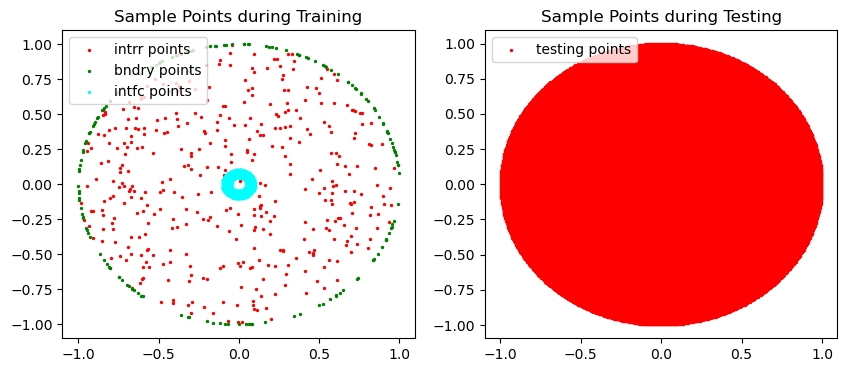

In [3]:
# fixed y
y = 0.0

# number of collocation points for each part
traindata_size_intrr_x = 400
traindata_size_bndry_x = 160 
traindata_size_intfc_x = 400
num_snglr_circles = 4

# generate testing points over the entire domain
x1 = torch.linspace(-1, 1, steps=traindata_size_intrr_x)
x2 = torch.linspace(-1, 1, steps=traindata_size_intrr_x)
X1, X2 = torch.meshgrid(x1, x2, indexing="ij")
TestPts_x = torch.squeeze(torch.stack([X1.reshape(1,-1), X2.reshape(1,-1)], dim=-1))
TestPts_y = torch.zeros_like(TestPts_x)
testdata = torch.cat((TestPts_x, TestPts_y),1)

def SmpPts_Interior_Plate2D(traindata_size_intrr_x):
    
    r_x = torch.sqrt(torch.rand(traindata_size_intrr_x, 1))
    theta_x = 2 * np.pi * torch.rand(traindata_size_intrr_x, 1)

    IntrrPts_x = torch.cat((r_x * torch.cos(theta_x), r_x * torch.sin(theta_x)), dim=1)
    IntrrPts_y = torch.zeros_like(IntrrPts_x) 

    return torch.cat((IntrrPts_x,IntrrPts_y), dim=1)

def SmpPts_Boundary_Plate2D(traindata_size_bndry_x): 

    theta_x = 2 * np.pi * torch.rand(traindata_size_bndry_x, 1)
    BndryPts_x = torch.cat((torch.cos(theta_x), torch.sin(theta_x)), dim=1)
    IntrrPts_y = torch.zeros_like(BndryPts_x)
    
    return torch.cat((BndryPts_x, IntrrPts_y), dim=1)

def SmpPts_Intfc_Plate2D(traindata_size_intfc_x, num_circles=4):
    
    max_varepsilon = 0.1
    varepsilon = (max_varepsilon * 0.8 ** (torch.linspace(1,num_circles,num_circles).unsqueeze(1)-1)).unsqueeze(1)
    circle_r_x = varepsilon.repeat(1, traindata_size_intfc_x, 1)
    theta_x = 2 * np.pi * torch.rand(num_circles, traindata_size_intfc_x, 1)
    
    IntrrPts_y = torch.zeros_like(torch.cat((circle_r_x, theta_x) ,dim=2)) 
    
    return torch.cat((circle_r_x * torch.cos(theta_x), circle_r_x * torch.sin(theta_x), IntrrPts_y), dim=2)

smppts_intrr = SmpPts_Interior_Plate2D(traindata_size_intrr_x)
smppts_bndry = SmpPts_Boundary_Plate2D(traindata_size_bndry_x)
smppts_intfc = SmpPts_Intfc_Plate2D(traindata_size_intfc_x)

fig = plt.figure(figsize=(10, 4), dpi= 100)
plt.subplot(1, 2, 1)
plt.scatter(smppts_intrr[:,0], smppts_intrr[:,1], c = 'red', label = 'intrr points', s=2)
plt.scatter(smppts_bndry[:,0], smppts_bndry[:,1], c = 'green', label = 'bndry points', s=2)
plt.scatter(smppts_intfc[:,:,0].reshape(-1,1), smppts_intfc[:,:,1].reshape(-1,1), c = 'cyan', label = 'intfc points', s=2)
plt.title('Sample Points during Training')
plt.legend(loc = 'upper left')

plt.subplot(1, 2, 2)
plt.scatter(X1[(X1 ** 2 + X2 ** 2)<= 1], X2[(X1 ** 2 + X2 ** 2)<= 1], c = 'red', label = 'testing points', s=2)
plt.title('Sample Points during Testing')
plt.legend(loc = 'upper left')
plt.show()

## 3-1. 准备工作 - 训练和测试数据集（再计算升维函数在样本点处的函数值）

In [4]:
# append the value of auxiliary variable for each input data point
smppts_intrr = torch.cat([smppts_intrr, torch.log(torch.norm(smppts_intrr[:,0:2]-smppts_intrr[:,2:4], dim=1, keepdim=True))], dim=1)
smppts_bndry = torch.cat([smppts_bndry, torch.log(torch.norm(smppts_bndry[:,0:2]-smppts_bndry[:,2:4], dim=1, keepdim=True))], dim=1)
smppts_intfc = torch.cat([smppts_intfc, torch.log(torch.norm(smppts_intfc[:,:,0:2]-smppts_intfc[:,:,2:4], dim=2, keepdim=True))], dim=2)
smppts_test = torch.cat([testdata, torch.log(torch.norm(testdata[:,0:2]-testdata[:,2:4], dim=1, keepdim=True))], dim=1)

# exact solution 
def Green_Exact_Plate2D(x, y):
    r = torch.norm( x - y, dim=1) 
    r_x = torch.norm(x, dim=1, keepdim=True)
    x_symtry = x / r_x ** 2
    r_symtry = torch.norm( y - x_symtry, dim=1)
    rho = torch.norm(x, dim=1)
    return - torch.log(r / (r_symtry * rho)) / ( 2 * np.pi)

# load train data in mini-batches
batch_num = 4
batchsize_intrr = traindata_size_intrr_x // batch_num
batchsize_bndry = traindata_size_bndry_x // batch_num
batchsize_intfc = num_snglr_circles // batch_num

dataset_intrr = TensorDataset(smppts_intrr)
dataset_bndry = TensorDataset(smppts_bndry)
dataset_intfc = TensorDataset(smppts_intfc)
dataloader_intrr= DataLoader(dataset_intrr, batch_size=batchsize_intrr, shuffle=True)
dataloader_bndry= DataLoader(dataset_bndry, batch_size=batchsize_bndry, shuffle=True)
dataloader_intfc= DataLoader(dataset_intfc, batch_size=batchsize_intfc, shuffle=True)

## 3-2. 网络训练

Done in 0:00:18.223847 !


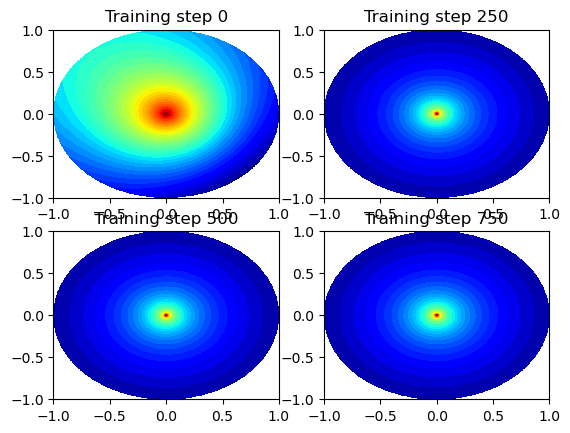

In [5]:
# penalty coefficient
beta_bndry = beta_intfc = 400
# for decay of learning rate
milestones = [500,650]

# create model
model = FcNet(5, 40, 1, 2)
model.Xavier_initi()

# create optimizer and learning rate schedular 
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
schedular = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1)

since = time.time()
for i in range(751):
    
    for _, ( (data_intrr,), (data_bndry,), (data_intfc,) ) in enumerate(zip(dataloader_intrr, cycle(dataloader_bndry), cycle(dataloader_intfc)) ):
        
        # enable computing gradients through autograd
        data_intrr.requires_grad = True
        data_intfc.requires_grad = True
        data_intfc = torch.squeeze(data_intfc)
        
        # forward pass 
        G_NN_intrr = model(data_intrr)
        G_NN_bndry = model(data_bndry)
        G_NN_intfc = model(data_intfc)
        
        # zero parameter gradients and then compute NN prediction of first-order derivatives 
        model.zero_grad()
        grad_NN_intrr = torch.autograd.grad(outputs=G_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(G_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0]
        Gx1_NN_intrr, Gx2_NN_intrr, Gz_NN_intrr = grad_NN_intrr[:,[0]], grad_NN_intrr[:,[1]], grad_NN_intrr[:,[-1]]

        # followed by computing NN prediction of second-order derivatives
        Gx1x1_NN_intrr = torch.autograd.grad(outputs=Gx1_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(Gx1_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0][:,[0]]
        Gx2x2_NN_intrr = torch.autograd.grad(outputs=Gx2_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(Gx2_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0][:,[1]]
        Gx1z_NN_intrr = torch.autograd.grad(outputs=Gx1_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(Gx1_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0][:,[-1]]
        Gx2z_NN_intrr = torch.autograd.grad(outputs=Gx2_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(Gx2_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0][:,[-1]]
        Gzz_NN_intrr = torch.autograd.grad(outputs=Gz_NN_intrr, inputs=data_intrr, grad_outputs=torch.ones_like(Gz_NN_intrr), retain_graph=True, create_graph=True, only_inputs=True)[0][:,[-1]]

        # assemble loss functions
        # for interior loss (regular part)
        dist_xy_intrr = torch.norm(data_intrr[:,0:2] - data_intrr[:,2:4], dim=1, keepdim=True)
        normVec_intrr = (data_intrr[:,0:2] - data_intrr[:,2:4]) / dist_xy_intrr ** 2      
        residual_intrr = - ( Gx1x1_NN_intrr + Gx2x2_NN_intrr + 2 * Gx1z_NN_intrr * normVec_intrr[:,[0]]
                      + 2 * Gx2z_NN_intrr * normVec_intrr[:,[1]] + Gzz_NN_intrr / dist_xy_intrr ** 2)
        # for normalization condition (singular part)
        grad_NN_intfc = torch.autograd.grad(outputs=G_NN_intfc, inputs=data_intfc, grad_outputs=torch.ones_like(G_NN_intfc), retain_graph=True, create_graph=True, only_inputs=True)[0]
        Gx1_NN_intfc, Gx2_NN_intfc, Gz_NN_intfc = grad_NN_intfc[:,[0]], grad_NN_intfc[:,[1]], grad_NN_intfc[:,[-1]]
        residual_snglr = - 2 * np.pi * (Gx1_NN_intfc * data_intfc[:,[0]] + Gx2_NN_intfc * data_intfc[:,[1]] + Gz_NN_intfc) - 1
        
        # construct mini-batch loss function and then perform backward pass
        loss_intrr = torch.mean( torch.pow( torch.squeeze( residual_intrr ), 2 ) )
        loss_intfc = torch.mean( torch.pow( torch.squeeze( residual_snglr ), 2 ) )
        loss_bndry = torch.mean( torch.pow( torch.squeeze( G_NN_bndry ), 2 ) ) 
                                       
        loss_minibatch = loss_intrr + beta_bndry * loss_bndry + beta_intfc * loss_intfc

        # zero parameter gradients
        optimizer.zero_grad()
        # backpropagation
        loss_minibatch.backward()
        # parameter update
        optimizer.step()
        
        # plot the result as training progresses
        list_of_plots = []
        plt.rcdefaults()

        if i % 250 == 0: 
            ax = plt.subplot(2, 2, i // 250 + 1)
            R = np.sqrt(X1**2 + X2**2) 
        
            G_test = model(smppts_test).detach()
            G_test = G_test.reshape(traindata_size_intrr_x, traindata_size_intrr_x)    
            G_test[G_test > 1e3] = 1e3
            G_test_masked = np.ma.masked_where(R > 0.9999, G_test)
            ax.contourf(X1, X2, G_test_masked, 40, cmap = 'jet')        
            ax.set_title(f"Training step {i}")
        
            list_of_plots.append(ax)
    
time_elapsed = time.time() - since
print('Done in {}'.format(str(datetime.timedelta(seconds=time_elapsed))), '!')

## 3-3. 展示计算结果

Text(0.5, 1.0, 'Point-Wise Error on Test Dataset')

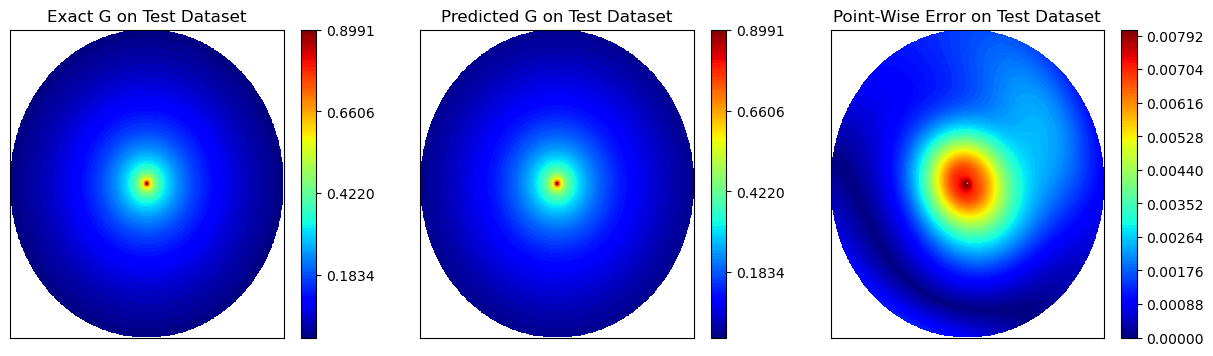

In [6]:
# plot the solution at y = 0.3
G_exact = Green_Exact_Plate2D(smppts_test[:,0:2], smppts_test[:,2:4])
G_pred = model(smppts_test).detach()
G_exact[torch.isnan(G_exact)] = 1e3
G_exact[G_exact>1e3], G_pred[G_pred>1e3] = 1e3, 1e3
G_exact = G_exact.reshape(traindata_size_intrr_x, traindata_size_intrr_x)
G_pred = G_pred.reshape(traindata_size_intrr_x, traindata_size_intrr_x)
R = np.sqrt(X1**2 + X2**2) 


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
G_exact_masked = np.ma.masked_where(R > 0.9999, G_exact)
plt.contourf(X1, X2, G_exact_masked, 100, cmap = 'jet')
bounds = torch.linspace(G_exact.min(), G_pred.max(), 5)
plt.colorbar(ticks=bounds)
plt.xticks([])
plt.yticks([])
plt.title('Exact G on Test Dataset')

plt.subplot(1, 3, 2)
G_pred_masked = np.ma.masked_where(R > 0.9999, G_pred)
plt.contourf(X1, X2, G_pred_masked, 100, cmap = 'jet')
plt.colorbar(ticks=bounds)
plt.xticks([])
plt.yticks([])
plt.title('Predicted G on Test Dataset')

plt.subplot(1, 3, 3)
PtErr_masked = np.ma.masked_where(R > 0.9999, torch.abs(G_exact-G_pred))
plt.contourf(X1, X2, PtErr_masked, 100, cmap = 'jet')
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.title('Point-Wise Error on Test Dataset')